In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
cripto_list = ['BTC', 'AVAX', 'DOT', 'ETH']

# Read data from local CSV files
BTC = pd.read_csv('./processed_data/combined_data/combined_bitcoin_data.csv')
AVAX = pd.read_csv('./processed_data/combined_data/combined_avax_data.csv')
DOT = pd.read_csv('./processed_data/combined_data/combined_dot_data.csv')
ETH = pd.read_csv('./processed_data/combined_data/combined_eth_data.csv')

# Store DataFrames in a list
cripto = [BTC, AVAX, DOT, ETH]
cripto_name = ["BTC", "AVAX", "DOT", "ETH"]

start = '2020-09'
end = '2024-04'
for c in cripto:
    # Convert 'open_time' to datetime format (assuming it is in UNIX timestamp format)
    c['open_time'] = pd.to_datetime(c['open_time'], unit='ms')
    # Set 'open_time' as the index
    c.set_index('open_time', inplace=True)

for i in range(len(cripto)):
    cripto[i]=cripto[i][start:end]

# Add a company name column to each DataFrame
for cripto_c, com_name in zip(cripto, cripto_name):
    cripto_c["cripto_name"] = com_name

# Concatenate all DataFrames into one
df = pd.concat(cripto, axis=0)

df.tail(10)


C:\Users\chang\AppData\Local\Temp\ipykernel_24632\2955395567.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cripto_c["cripto_name"] = com_name
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\2955395567.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cripto_c["cripto_name"] = com_name
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\2955395567.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,cripto_name
open_time,,,,,,,,,,,,
2024-04-30 14:00:00,2993.60,3037.42,2985.01,3020.38,24778.4721,1714489199999,7.455754e+07,62215,12328.1627,3.709404e+07,0,ETH
2024-04-30 15:00:00,3020.38,3029.00,2985.16,2994.12,26680.0330,1714492799999,8.004333e+07,61643,12233.6121,3.670742e+07,0,ETH
2024-04-30 16:00:00,2994.11,2998.60,2945.00,2986.99,37975.1894,1714496399999,1.128950e+08,84519,18307.8533,5.443547e+07,0,ETH
2024-04-30 17:00:00,2987.00,2998.00,2975.07,2985.26,19114.6999,1714499999999,5.707040e+07,49925,8742.1403,2.610235e+07,0,ETH
2024-04-30 18:00:00,2985.25,2991.83,2955.88,2976.39,17899.6879,1714503599999,5.321420e+07,49965,9001.2568,2.676012e+07,0,ETH
2024-04-30 19:00:00,2976.39,2985.83,2921.00,2928.96,43111.2783,1714507199999,1.270188e+08,84456,20327.1788,5.989574e+07,0,ETH
2024-04-30 20:00:00,2928.96,2980.63,2928.00,2967.01,27006.2528,1714510799999,8.001884e+07,58057,12853.0999,3.807962e+07,0,ETH
2024-04-30 21:00:00,2967.00,2994.30,2966.28,2987.87,11883.6456,1714514399999,3.545125e+07,33892,6224.4794,1.856798e+07,0,ETH
2024-04-30 22:00:00,2987.87,3029.40,2985.93,3010.11,18116.0664,1714517999999,5.451401e+07,50407,9093.2425,2.735811e+07,0,ETH


In [13]:
# Summary Stats
BTC.describe()

,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
count,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,4.086100e+04,4.086100e+04,4.086100e+04,40861.000000,4.086100e+04,40861.0
mean,29356.240981,29496.310845,29208.306316,29357.492164,3724.749298,1.640942e+12,9.597291e+07,8.334776e+04,1842.674989,4.750147e+07,0.0
std,16978.841096,17069.156319,16882.312624,16979.266188,4846.474858,4.250014e+10,1.158856e+08,1.012882e+05,2417.305955,5.780768e+07,0.0
min,4131.230000,4610.000000,3782.130000,4130.640000,0.000000,1.567300e+12,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0
25%,13576.140000,13638.290000,13506.280000,13584.110000,1204.707170,1.604131e+12,2.503904e+07,2.697100e+04,588.745684,1.205467e+07,0.0
50%,27303.950000,27407.420000,27200.240000,27304.400000,2093.060814,1.640970e+12,5.948544e+07,4.728000e+04,1028.098150,2.914025e+07,0.0
75%,42054.540000,42237.240000,41851.500000,42057.260000,4180.188240,1.677744e+12,1.237612e+08,9.338600e+04,2061.455590,6.143485e+07,0.0
max,73577.350000,73777.000000,73215.140000,73577.350000,137207.188600,1.714522e+12,3.005634e+09,1.442097e+06,68611.450390,1.502977e+09,0.0


In [14]:
# General info
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40861 entries, 2019-09-01 00:00:00 to 2024-04-30 23:00:00
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    40861 non-null  float64
 1   high                    40861 non-null  float64
 2   low                     40861 non-null  float64
 3   close                   40861 non-null  float64
 4   volume                  40861 non-null  float64
 5   close_time              40861 non-null  int64  
 6   quote_volume            40861 non-null  float64
 7   count                   40861 non-null  int64  
 8   taker_buy_volume        40861 non-null  float64
 9   taker_buy_quote_volume  40861 non-null  float64
 10  ignore                  40861 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 4.7 MB


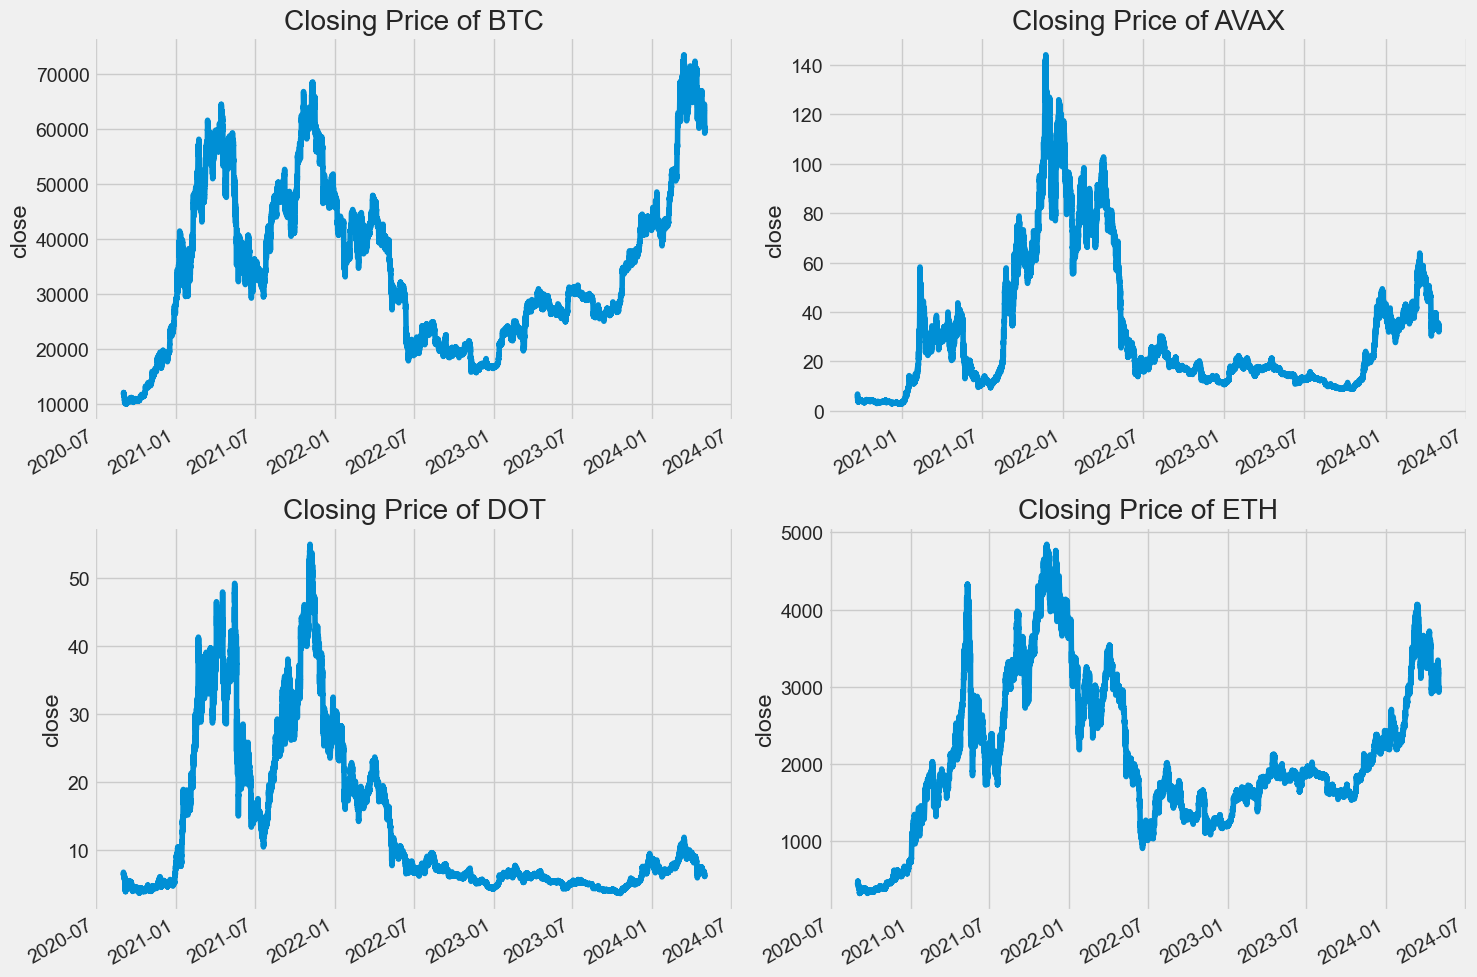

In [15]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(cripto, 1):
    plt.subplot(2, 2, i)
    company['close'].plot()
    plt.ylabel('close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {cripto_list[i - 1]}")
    
plt.tight_layout()

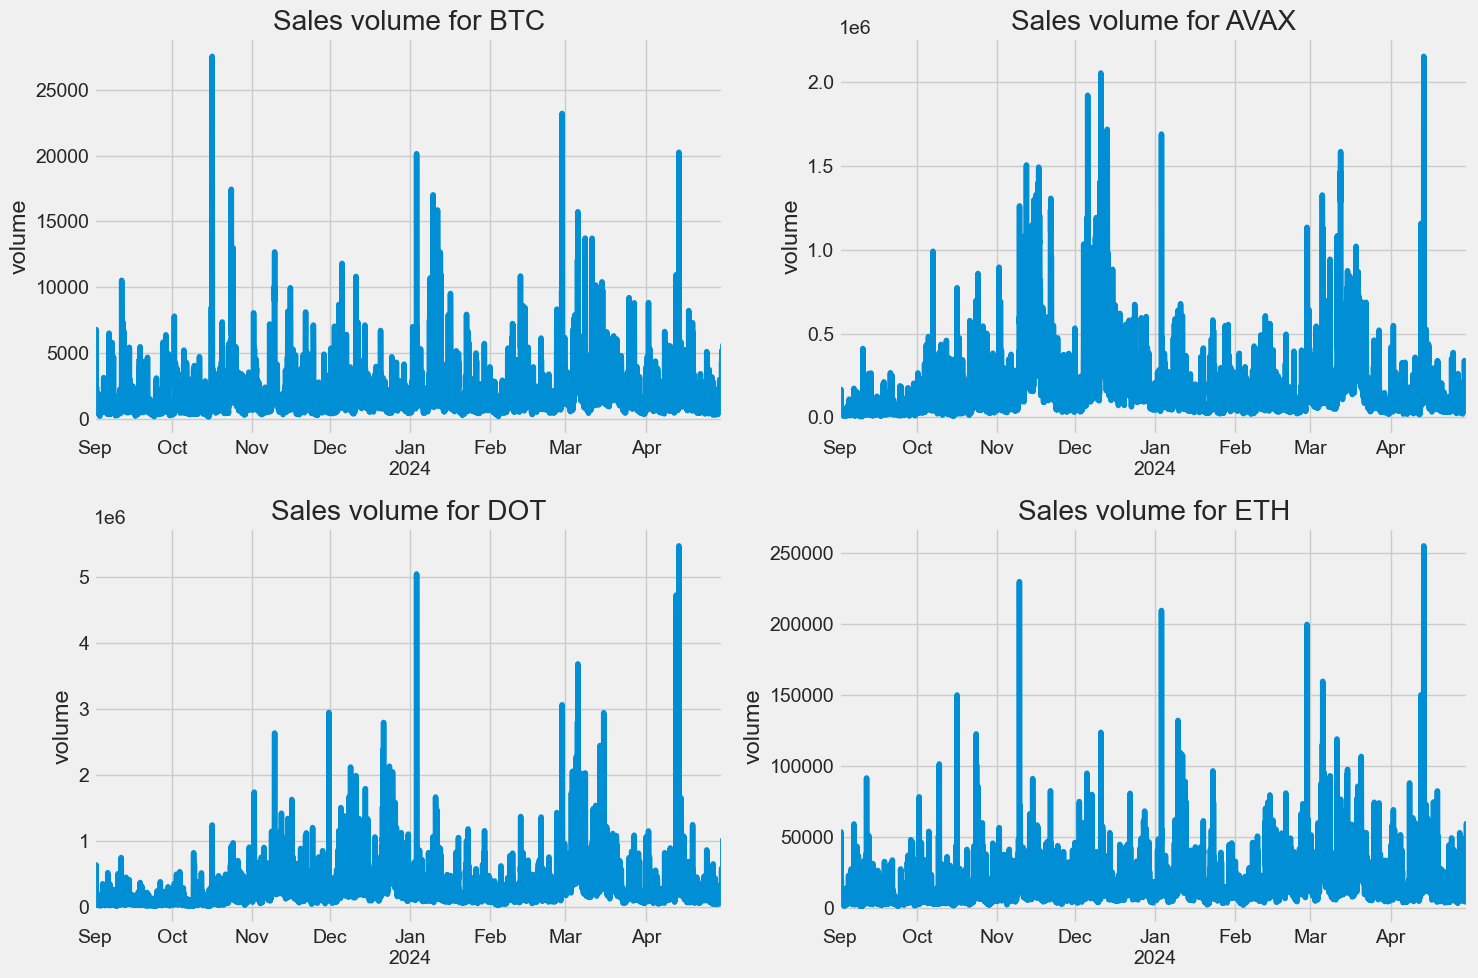

In [16]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
start = '2023-09'
end = '2024-04'
for i, company in enumerate(cripto, 1):
    plt.subplot(2, 2, i)
    company[start:end]['volume'].plot()
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.title(f"Sales volume for {cripto_list[i - 1]}")
    
plt.tight_layout()

C:\Users\chang\AppData\Local\Temp\ipykernel_24632\3055157654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['close'].rolling(ma).mean()
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\3055157654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['close'].rolling(ma).mean()
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\3055157654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

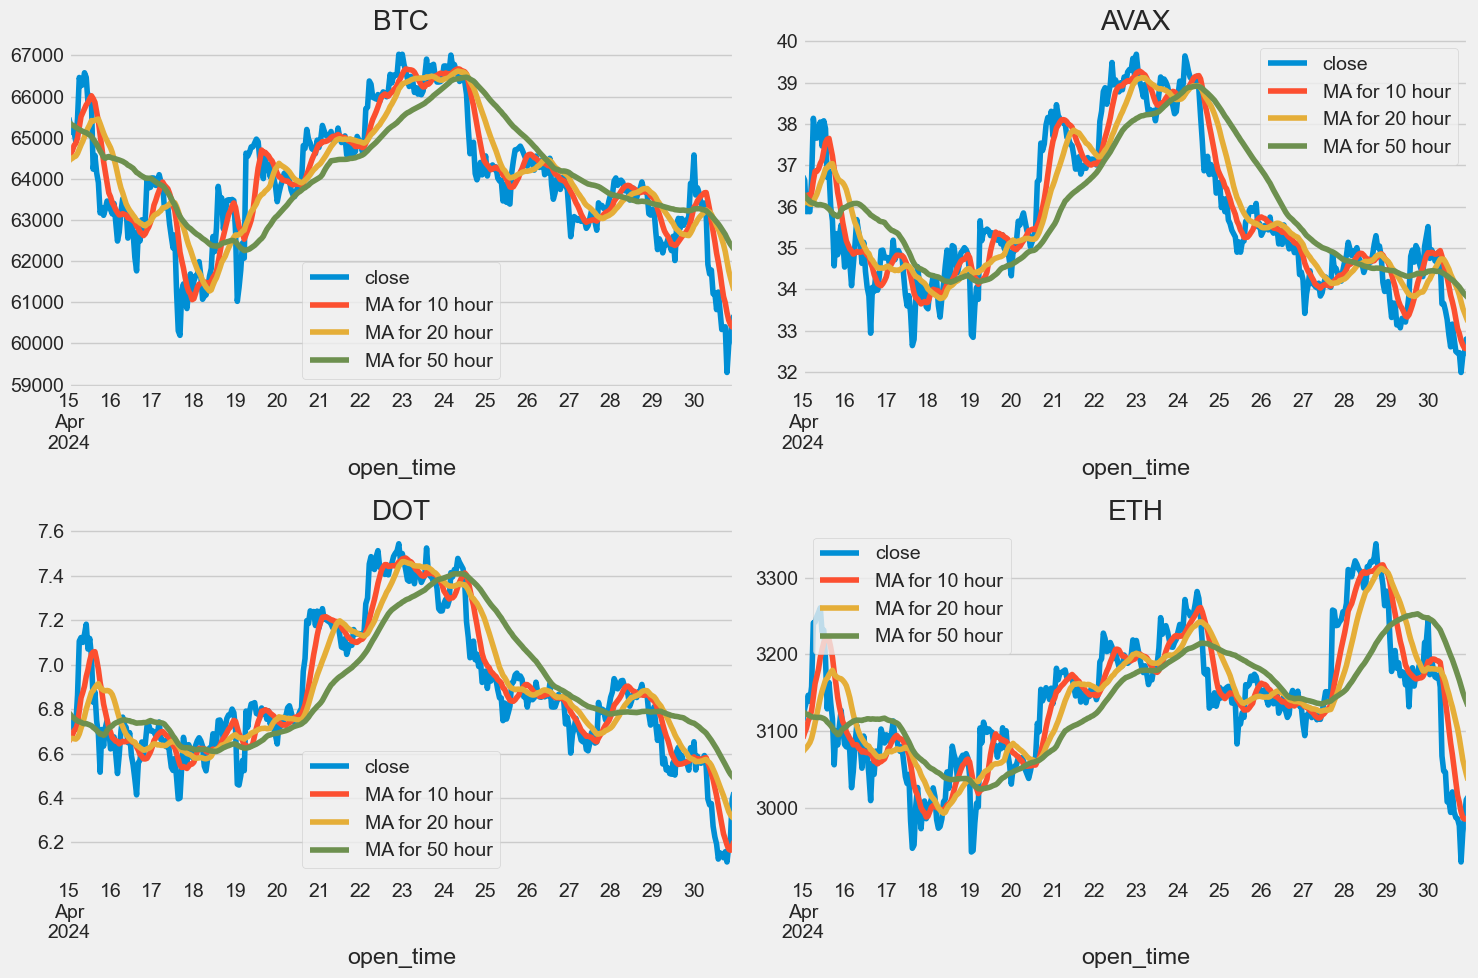

In [17]:
ma_day = [10, 20, 50]
start = '2024-04-15'
end = '2024-04-30'
for ma in ma_day:
    for company in cripto:
        column_name = f"MA for {ma} hour"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

cripto[0][start:end][['close', 'MA for 10 hour', 'MA for 20 hour', 'MA for 50 hour']].plot(ax=axes[0,0])
axes[0,0].set_title('BTC')

cripto[1][start:end][['close', 'MA for 10 hour', 'MA for 20 hour', 'MA for 50 hour']].plot(ax=axes[0,1])
axes[0,1].set_title('AVAX')

cripto[2][start:end][['close', 'MA for 10 hour', 'MA for 20 hour', 'MA for 50 hour']].plot(ax=axes[1,0])
axes[1,0].set_title('DOT')

cripto[3][start:end][['close', 'MA for 10 hour', 'MA for 20 hour', 'MA for 50 hour']].plot(ax=axes[1,1])
axes[1,1].set_title('ETH')

fig.tight_layout()

C:\Users\chang\AppData\Local\Temp\ipykernel_24632\1520621540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Hourly Return'] = company['close'].pct_change()
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\1520621540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Hourly Return'] = company['close'].pct_change()
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\1520621540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

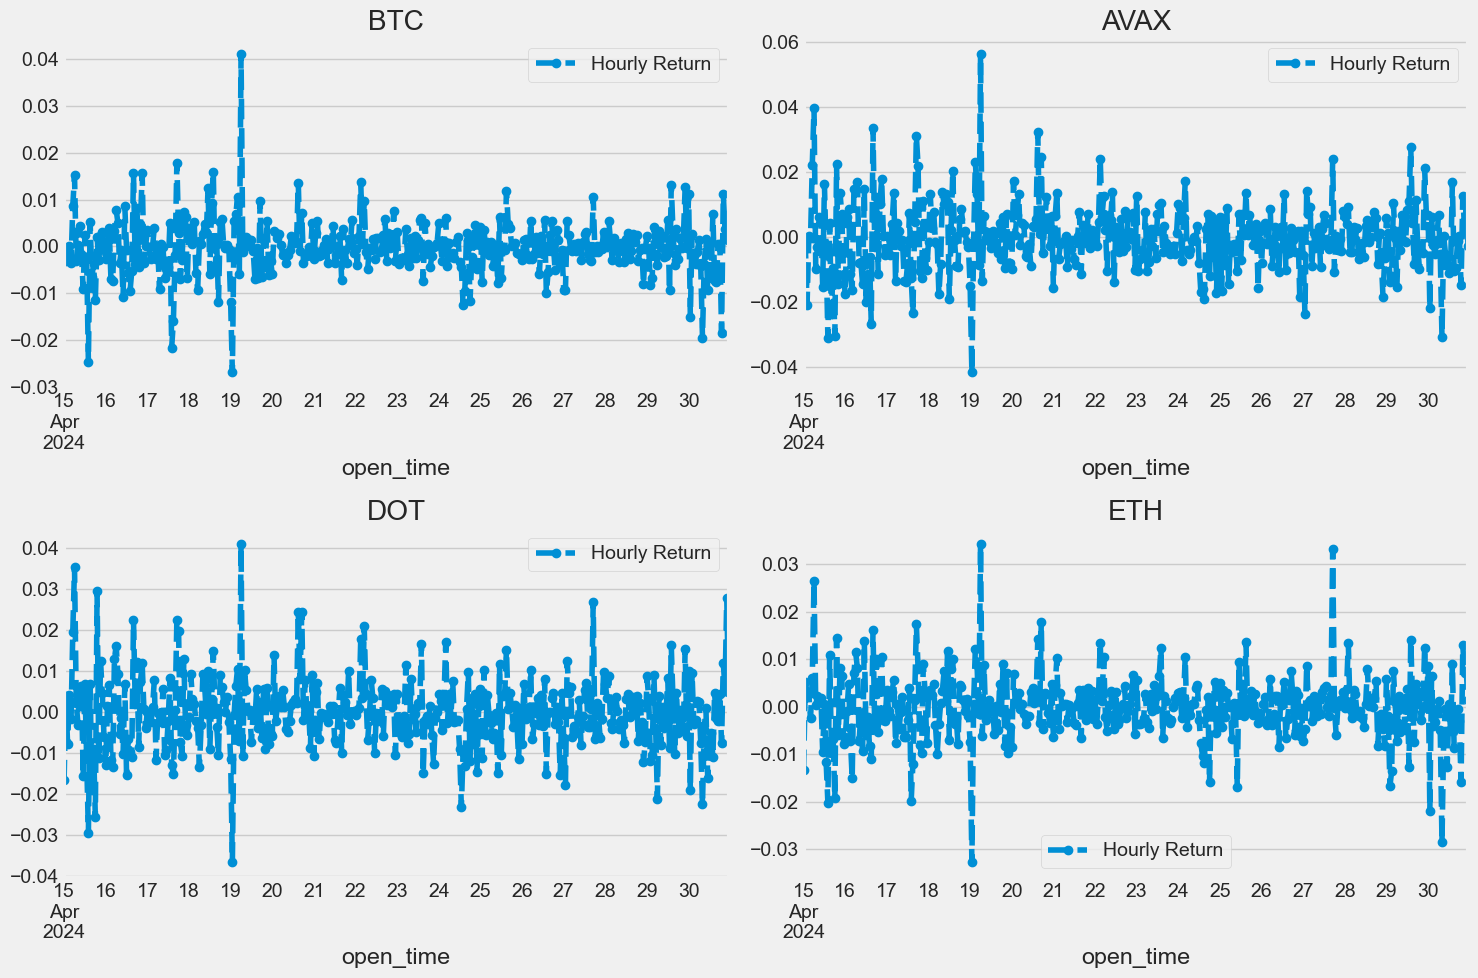

In [18]:
start = '2024-04-15'
end = '2024-04-30'
# We'll use pct_change to find the percent change for each day
for company in cripto:
    company['Hourly Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

cripto[0][start:end]['Hourly Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('BTC')

cripto[1][start:end]['Hourly Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AVAX')

cripto[2][start:end]['Hourly Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('DOT')

cripto[3][start:end]['Hourly Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('ETH')

fig.tight_layout()

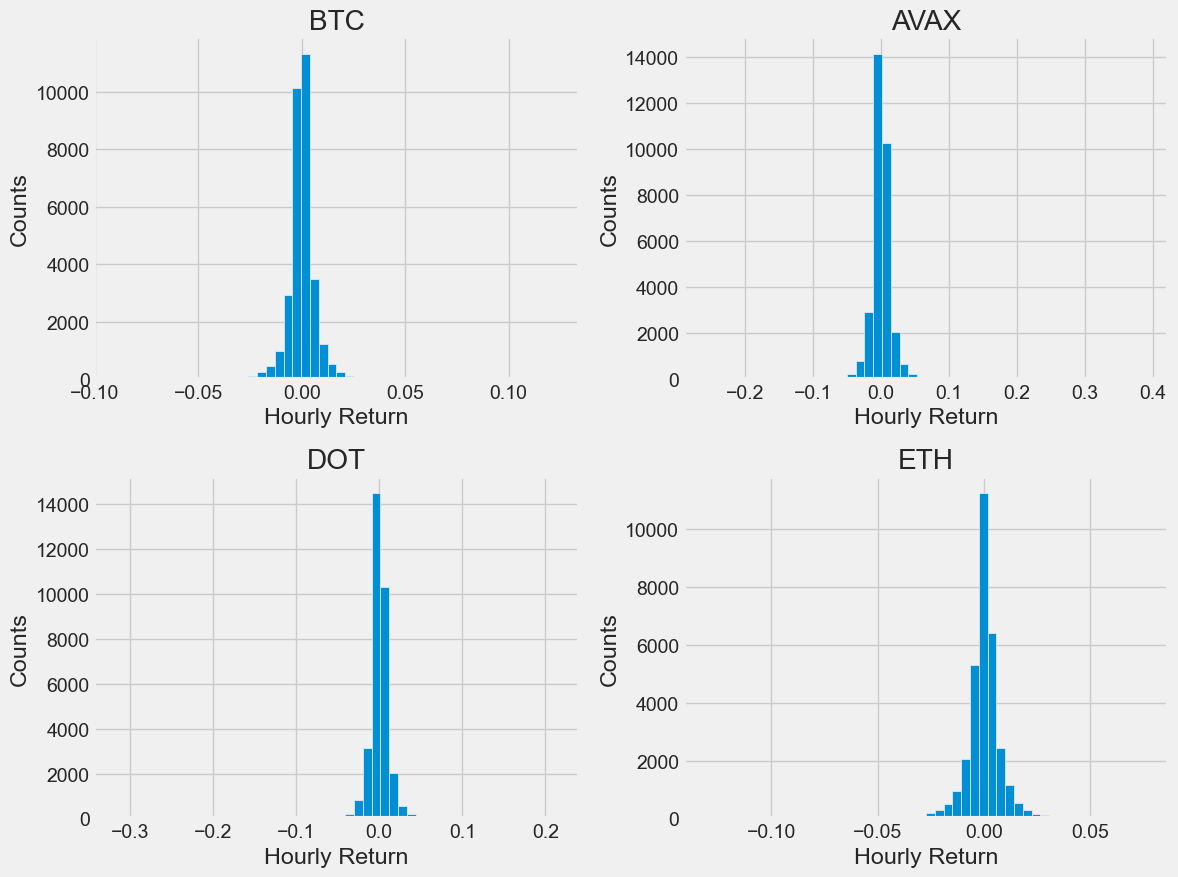

In [19]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(cripto, 1):
    plt.subplot(2, 2, i)
    company['Hourly Return'].hist(bins=50)
    plt.xlabel('Hourly Return')
    plt.ylabel('Counts')
    plt.title(f'{cripto_name[i - 1]}')
    
plt.tight_layout()

cripto_name      AVAX       BTC       DOT       ETH
cripto_name                                        
AVAX         1.000000  0.626530  0.613398  0.813046
BTC          0.626530  1.000000  0.690781  0.840537
DOT          0.613398  0.690781  1.000000  0.662258
ETH          0.813046  0.840537  0.662258  1.000000


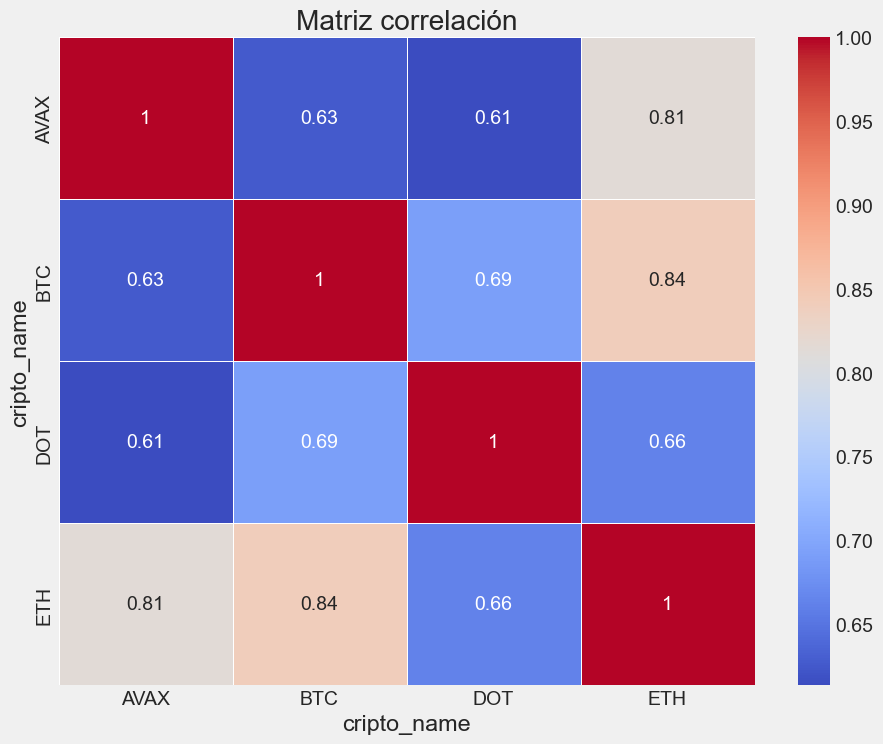

In [20]:
# Extract closing prices
closing_prices = df.pivot_table(values='close', index=df.index, columns='cripto_name')

# Calculate the correlation matrix
correlation_matrix = closing_prices.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz correlación')
plt.show()


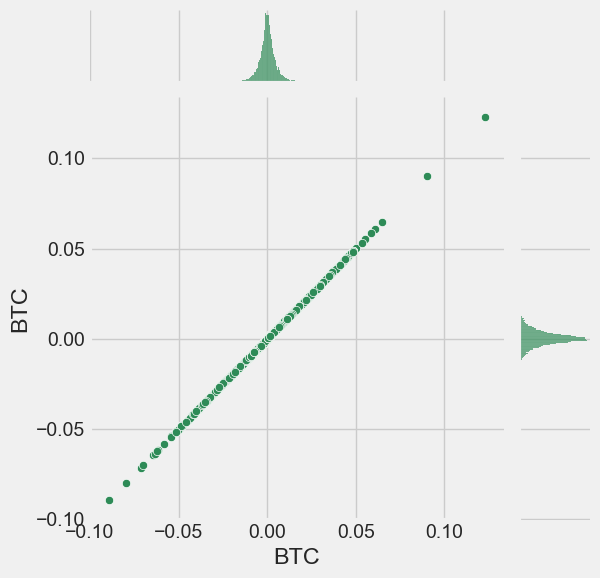

In [21]:
# # Grab all the closing prices for the tech stock list into one DataFrame
start = '2024-03-01'
end = '2024-04-01'


# Add a company name column to each DataFrame
# Extract closing prices
filtered_df = df
tech_rets = filtered_df.pivot_table(values='close', index=filtered_df.index, columns='cripto_name')
tech_rets = tech_rets.pct_change()
sns.jointplot(x='BTC', y='BTC', data=tech_rets, kind='scatter', color='seagreen')



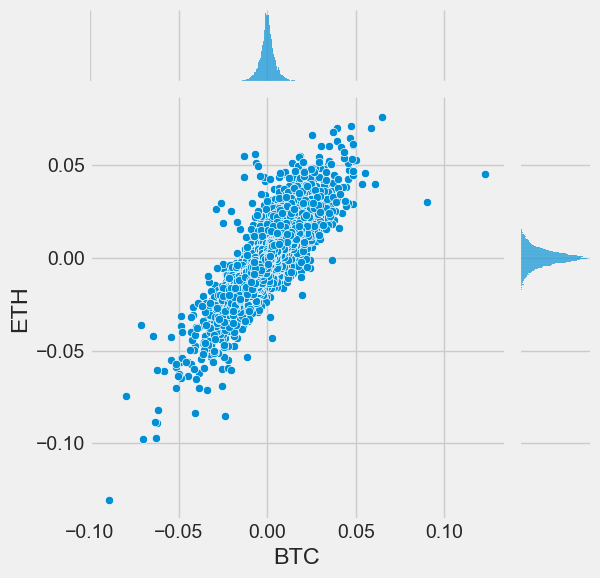

In [22]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='BTC', y='ETH', data=tech_rets, kind='scatter')

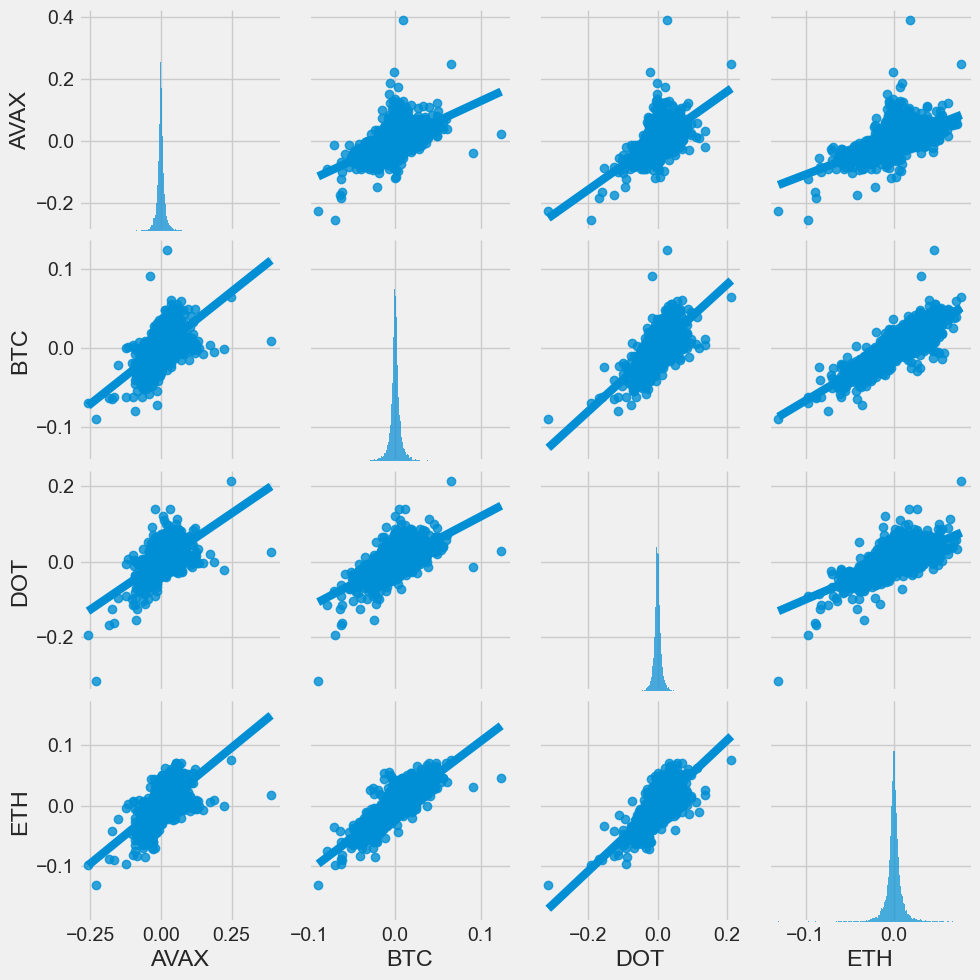

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

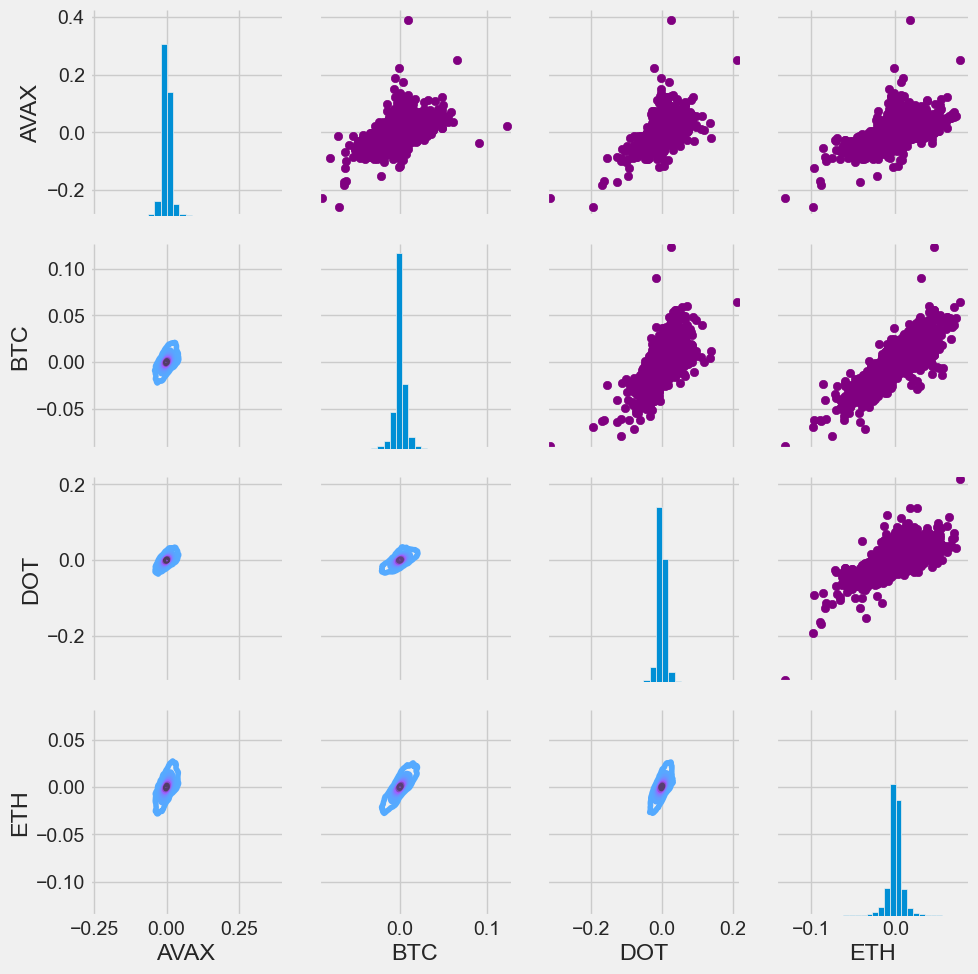

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

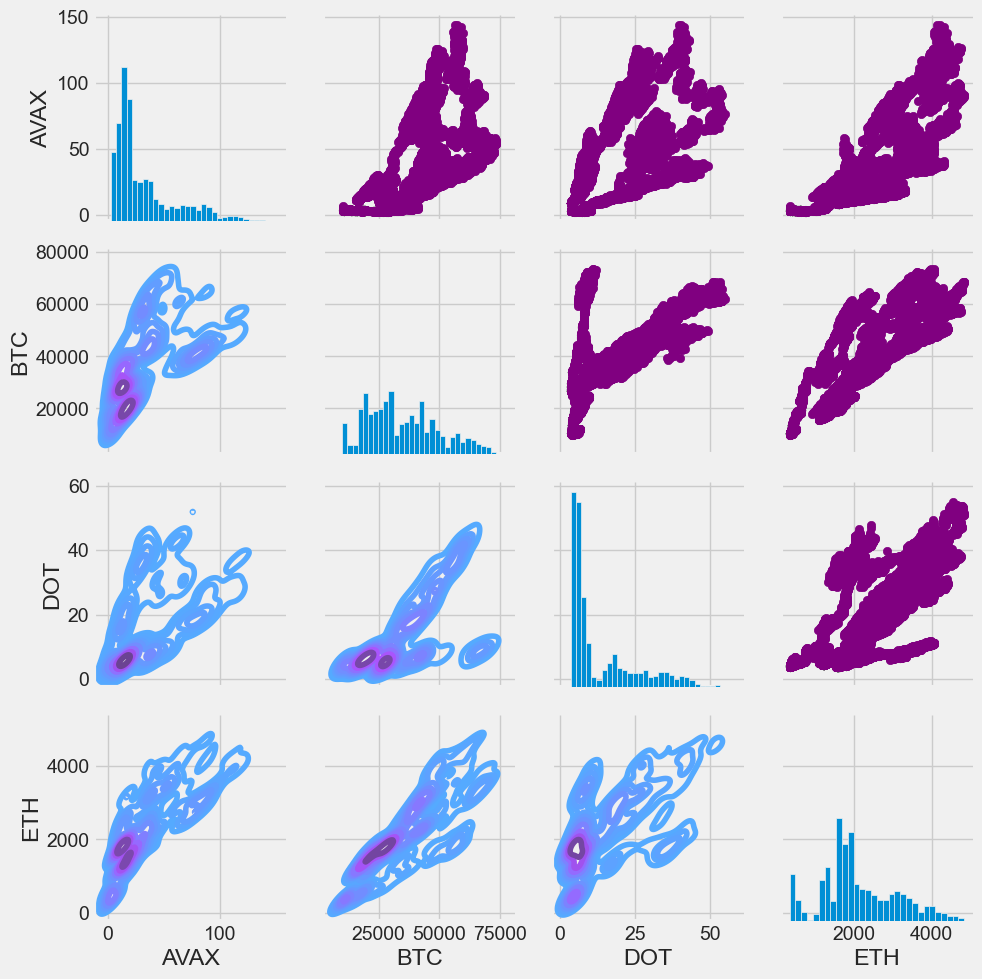

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_prices)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

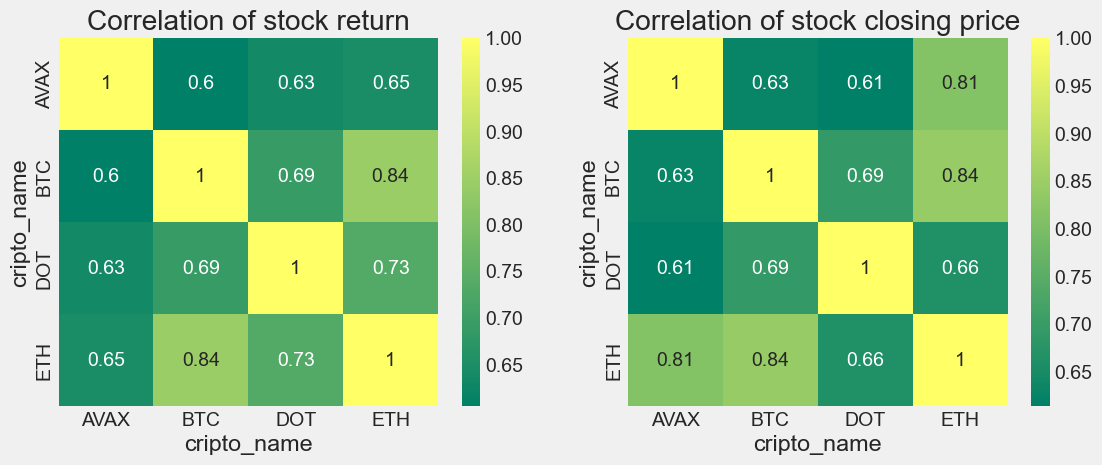

In [26]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_prices.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

C:\Users\chang\AppData\Local\Temp\ipykernel_24632\303714829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cripto[i]['normalized_close'] = (cripto[i]['close'] - min_price) / (max_price - min_price)
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\303714829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cripto[i]['normalized_close'] = (cripto[i]['close'] - min_price) / (max_price - min_price)
C:\Users\chang\AppData\Local\Temp\ipykernel_24632\303714829.py:5: SettingWithCopyWarning: 
A value is tryi

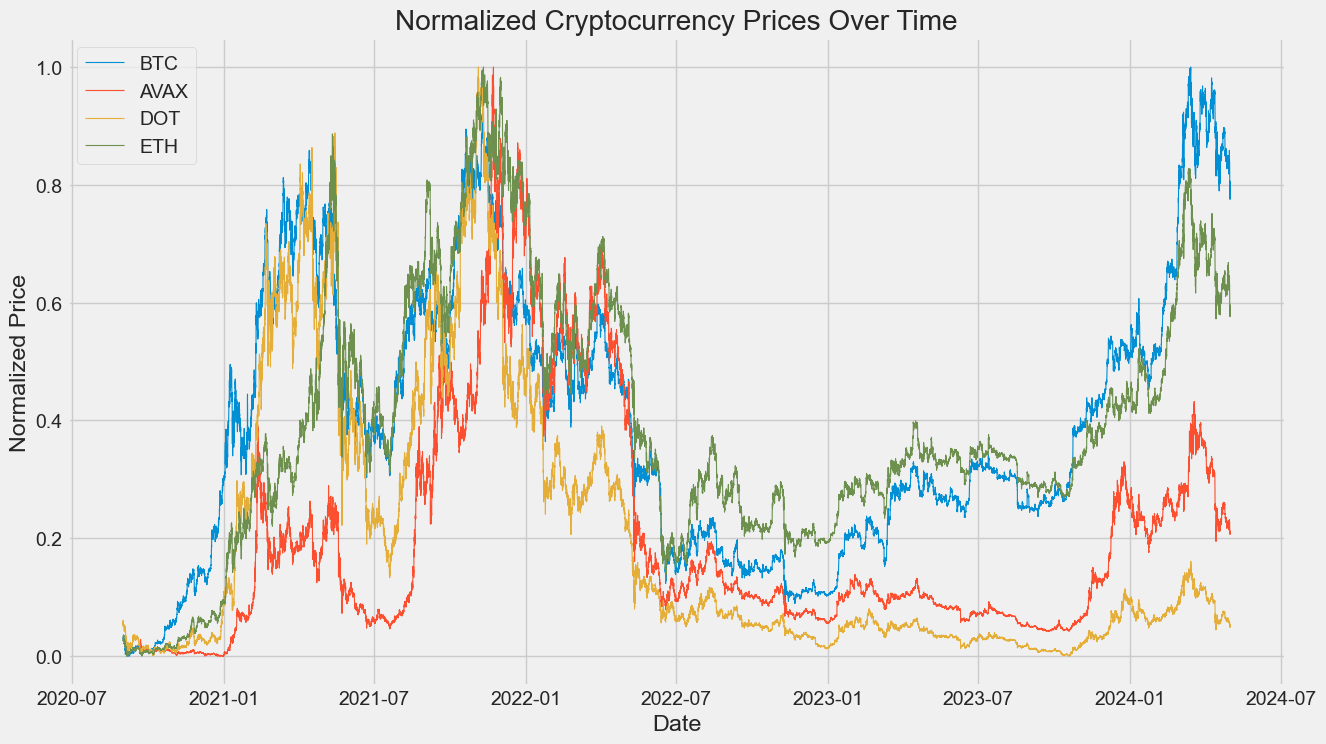

In [28]:
# Min-Max normalize the prices
for i in range(len(cripto)):
    min_price = cripto[i]['close'].min()
    max_price = cripto[i]['close'].max()
    cripto[i]['normalized_close'] = (cripto[i]['close'] - min_price) / (max_price - min_price)

# Concatenate all DataFrames into one
df = pd.concat(cripto, axis=0)
# Plot all normalized cripto prices
plt.figure(figsize=(14, 8))
for name in cripto_name:
    plt.plot(df[df['cripto_name'] == name].index, df[df['cripto_name'] == name]['normalized_close'], label=name, linewidth=0.8)

plt.title('Normalized Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()